In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import kraken as pla
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import os

In [3]:
data_folder='/home/sebastian/data/ssamLiteDataFinal/HCAPancreas/'

coordinates = pd.read_csv(os.path.join(data_folder,'coordinates.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'signatures_original.csv'),index_col=0)
# filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']

# coord_tables=[]

# for file_coordinates in filenames:
#     coord_tables.append(pd.read_csv(file_coordinates))
    

# coordinates=pd.concat(coord_tables)

# coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
# coordinates.gene.replace('KISS','KISS1', inplace=True)

# coordinates.index = np.arange(coordinates.shape[0])
# coordinates

In [4]:
adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')
bg = pla.PixelMap(np.load('bg.npy').T,upscale=0.2)


In [5]:

# sdata = pla.SpatialData(coordinates.gene, 
#                        coordinates.X, 
#                        coordinates.Y,)[::2]

sdata["celltype"] = signatures.index[np.array(signatures).argmax(0)[sdata.gene_ids]]
sdata.celltype = sdata.celltype.astype('category')

In [17]:
signatures.index

Index(['Acinar-i', 'Acinar-s', 'Acinar-REG+', 'Activated Stellate',
       'Quiescent Stellate', 'Alpha', 'Beta', 'Gamma (PP)', 'Delta', 'Ductal',
       'MUC5B+ Ductal (PDG)', 'MHC Class II', 'Schwan', 'B cell', 'T cell',
       'Endothelial'],
      dtype='object')

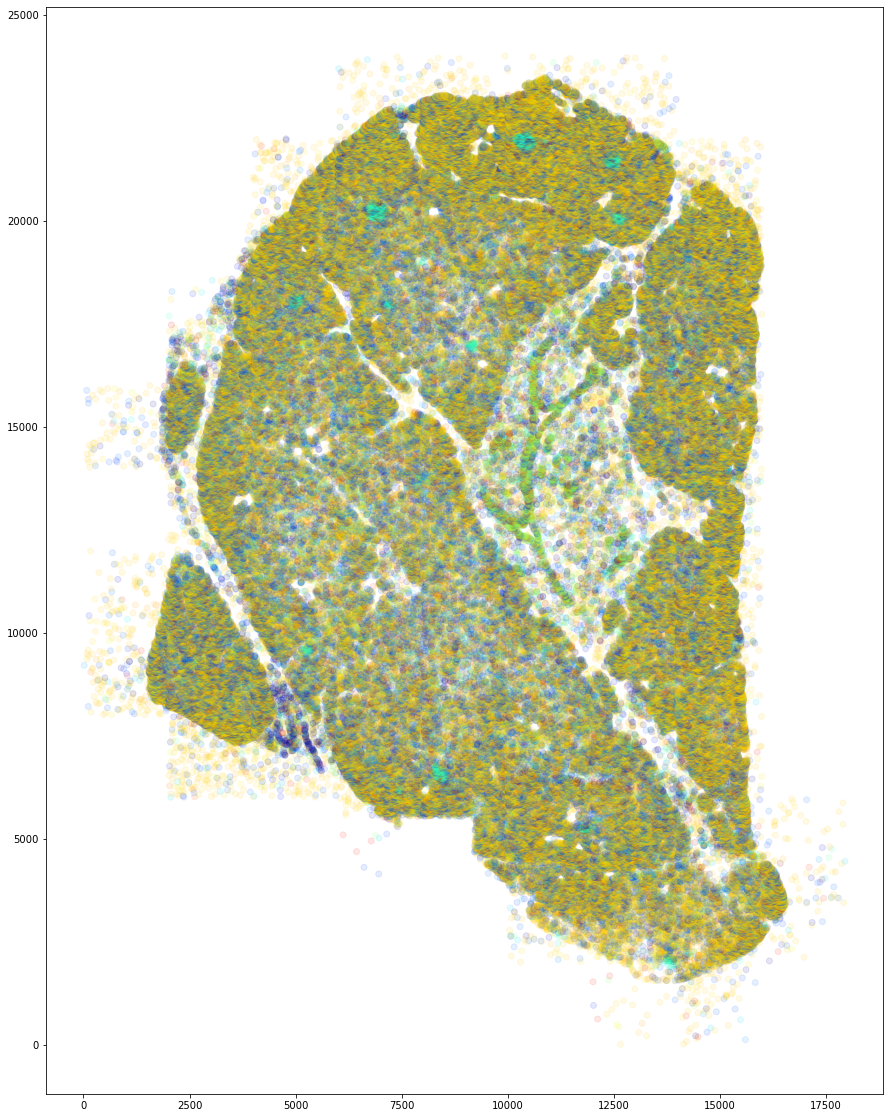

In [7]:
plt.figure(figsize=(15,20))
sdata.scatter(c = sdata.gene_ids,alpha=0.1)

In [8]:
sdata.graph.update_knn(n_neighbors=10)
sdata.graph.run_umap(bandwidth=50,n_neighbors=60)


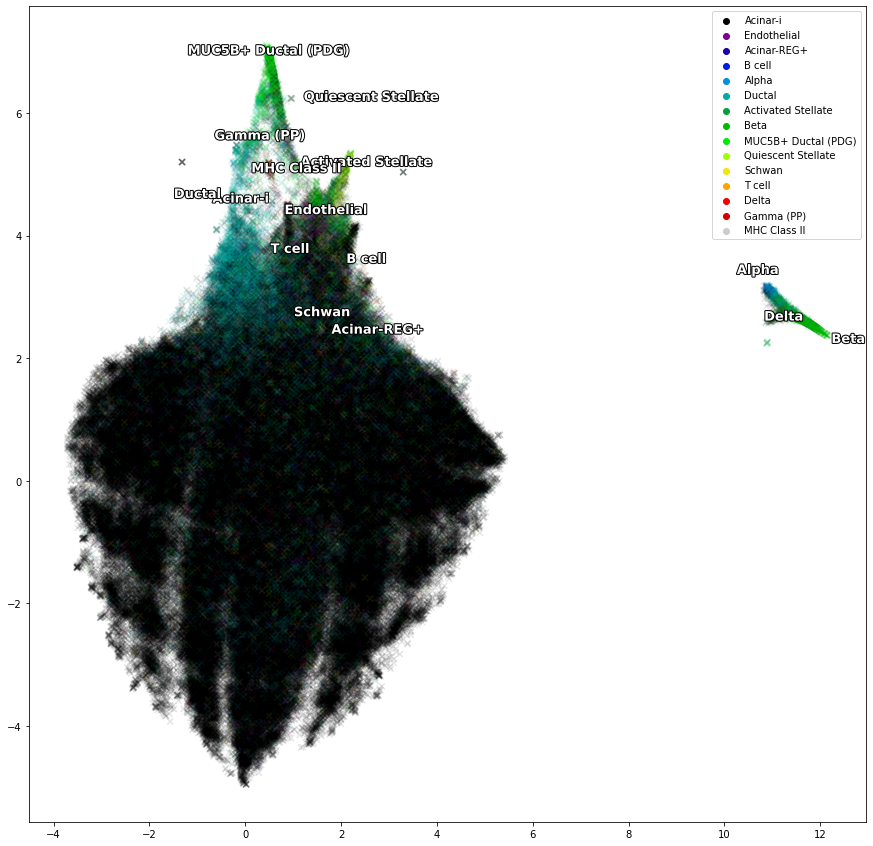

In [15]:
plt.figure(figsize=(15,15))
sdata.graph.plot_umap(text_column='celltype',color_category='celltype', alpha=0.1,cmap='nipy_spectral',marker='x')

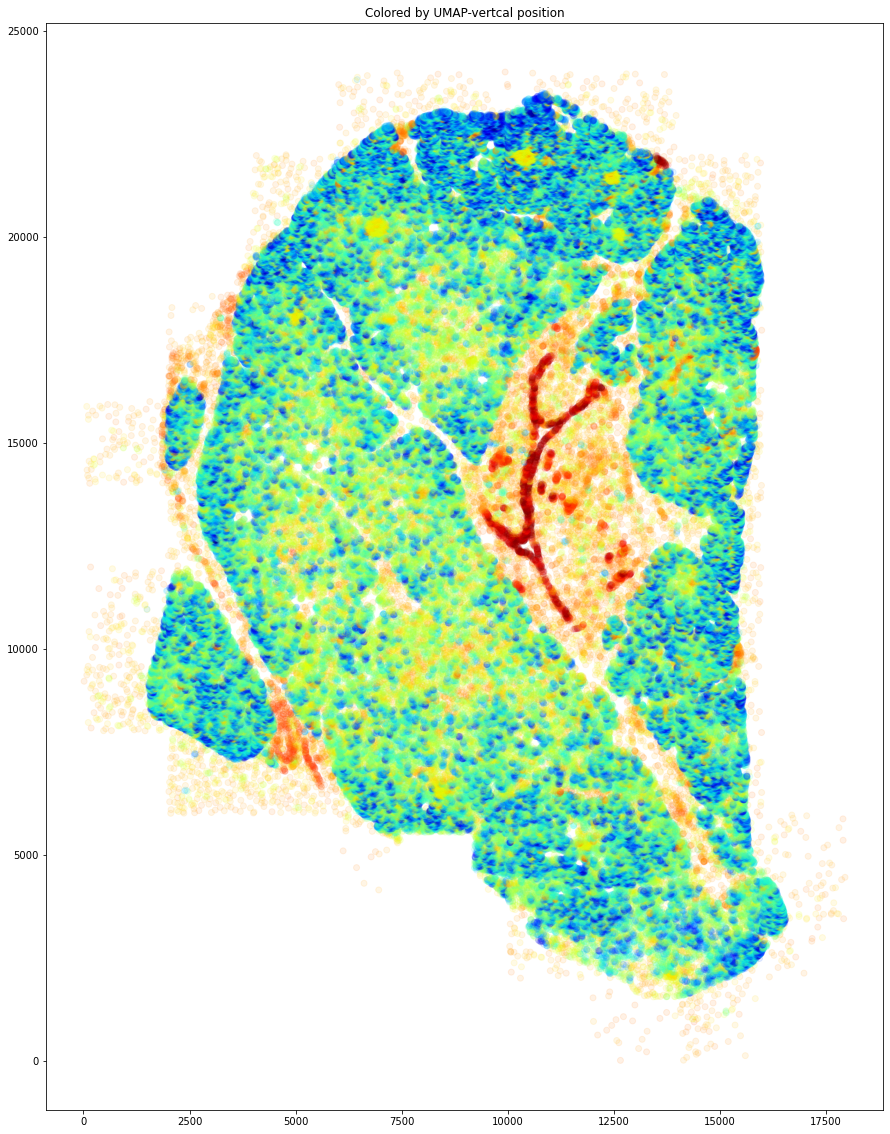

In [18]:
plt.figure(figsize=(15,20))
plt.title('Colored by UMAP-vertcal position')
sdata.scatter(c = sdata.graph.umap[:,1],alpha=0.1)

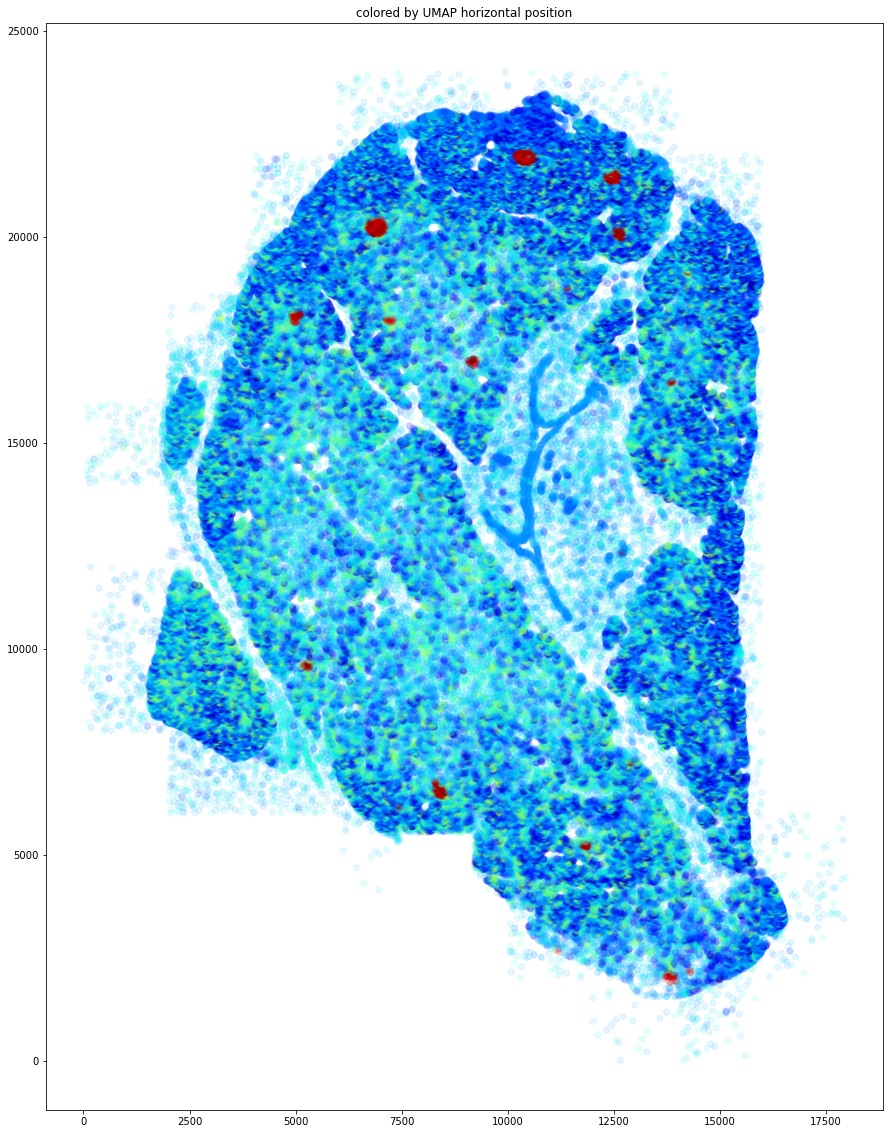

In [19]:
plt.figure(figsize=(15,20))
plt.title('colored by UMAP horizontal position')
sdata.scatter(c = sdata.graph.umap[:,0],alpha=0.1)

In [10]:
sdata.graph.update_knn(n_neighbors=100)
sdata.graph.run_tsne(bandwidth=80,)

/home/sebastian/anaconda3/envs/spaceQC/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sebastian/anaconda3/envs/spaceQC/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,15))
sdata.graph.plot_tsne(text_column='celltype',color_category='celltype', alpha=0.1,cmap='viridis',marker='x')

In [ ]:
dist_from_center = ((sdata.x-1000)**2+(sdata.y-2000)**2)**0.5

sdata.scatter(c=dist_from_center)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(*sdata.graph._umap.T, c=dist_from_center, alpha=0.1, cmap='nipy_spectral')

In [ ]:
plt.figure(figsize=(21,21))
sdata.graph.plot_umap(alpha=0.01)